# Euler method - numerical estimate of an integral

## Method

Let $f:x\mapsto y=f(x)$ be a continuous real valued function in the domain $x\in[a,b]$. The integral of this function between $a$ and $b$ is formally written as:
$$
I = \int_{a}^{b} f(x)dx \ .
$$
The integral can be either positive if $f(x)\geq 0$ or negative otherwise. It represents the area between the curve and the $x$-axis if $f(x)\geq 0$ and the area multiplied by $-1$ if the curve is below the axis, i.e., if $f(x)\leq 0$. 
To find a numerical estimate of $I$, we should remind what is the definition of the integral. 

Consider the graph of the function $y=f(x)$. Imagine we slice the function into small rectangles of width $h=\frac{b-a}{n}$, where $n$ is large enough so that $h\ll b-a$. We conventionally choose the rectangle of length that equates the value of the function at the left side of the interval (see figure hereafter). Assuming that $f(x)\geq 0,\ \forall a\leq x \leq b$, the area between the curve and the $x$-axis can be approximated as the sum of the area of the small rectangular slices:
$$
A \approx A_n = \sum_{k=0}^{n} f(x_k)\cdot h\ , 
$$
where $x_{k} = a+k\cdot h$
Basically, an integral is nothing but a sum of the area of small slices rectangles: 
$$
A = \lim_{n\rightarrow +\infty} A_n\ .
$$
What is infinity for a computer but a very large number? Can an algorithm conceive the infinity? I guess no.. So, the integral that we estimate is nothing but an approximation, with enough digits to consider that it's enough precision for a given problem. I think that's the key of science: we have a model, we find numerical estimates of a physical quantity and one day we find data from an experiment that shows a discrepancy at the 12th digits and then we change the model to find the correct digit.  

Anyway, what we should do now is to find an algorithm for our not-so-smart computer to calculate this integral. Well, as we see, it's nothing but a sum. I suggest that we start with standard functions for which we know the exact integrals and then we go with crazily complicated functions. 

## Example: linear and reciprocal functions

Let's start with the linear function: $f(x) = 2x$, with $a=1$ and $b=2$. Formally, we have:
$$
\int_{1}^{2} 2x dx= \left[x^2\right]_{1}^2 = 4-1 = 3\ .
$$ 
Let's check whether we can find a similar value using the Euler algorithm.

We will set $n=100$ for a start and we can increase $n$ after that. 

In [ ]:
n=100
s=0
a=1
b=2
h=(b-a)/n
x=a
s=0
for k in range(n):
  y=2*x
  s=s+y*h
  x=x+h
  k=k+1
print(s) 

2.990000000000002


Now we can take $n=10^4$ and see what's going on:

In [ ]:
n=10**4
s=0
a=1
b=2
h=(b-a)/n
x=a
s=0
for k in range(n):
  y=2*x
  s=s+y*h
  x=x+h
  k=k+1
print(s) 

2.999899999999889


As we see, it seems that the error is about $\frac{1}{n}$. If you study the Monte Carlo tutorial, you'll see that we get a precision of the order of $\frac{1}{\sqrt{n}}$, which is much less as of Euler method. However, it takes much less time to generate random numbers. 

FYI, we can increase the precision by using a slightly different algorithm. We could use the trapezoid method. In this case, we would get an error of the order of $\frac{1}{n^2}$. 

In [ ]:
n=100
a=1
b=2
h=(b-a)/n
x=a
s=0
for k in range(n):
  y1=2*x
  x=x+h
  y2=2*x
  s=s+(y1+y2)*h/2
  k=k+1
print(s)

3.0


It's seems to be exact!! Well, it's not surprising as we use trapezoids. Think about it, is there a better approximatiion for linear functions? I guess not. Now, let's apply this technique to more complicated functions. 

## Rational function

Let's look at more complicated functions, such as:
$$
f(x) = \frac{1}{x^2+1}
$$
We want to integrate this function between $x=-1$ and $x=1$.

In [ ]:
n=10000
s=0
a=-1
b=1
h=(b-a)/n
x=a
s=0
for k in range(n):
  y=1/(x**2+1)
  s=s+y*h
  x=x+h
  k=k+1
print(s)

1.5707963234615994


Ok, now we can integrate standard functions, suh as: $e^{x}$, $\cos(x)$, etc.. 

Say we want to find the integral:
$$
\int_0^1 e^{x} dx
$$
which we know to be equal to 
$$
e -1 \approx  1.7182818284590
$$
How did we find that number? We use numerical algorithm of course! We'll see if our algorithm is good enough. 

In order we need to import the function using the numpy library: 

import numpy as np  

and then to use the function:

np.exp(x)

We take $n=10000$. 



In [ ]:
import numpy as np
n=10000
s=0
a=0
b=1
h=(b-a)/n
x=a
s=0
for k in range(n):
  y=np.exp(x)
  s=s+y*h
  x=x+h
  k=k+1
print(s)

1.7181959157994453


If we use the trapezoid method, the error would be much smaller (1 order of magnitude)

In [ ]:
import numpy as np
n=1000
a=0
b=1
h=(b-a)/n
x=a
s=0
for k in range(n):
  y1=np.exp(x)
  x=x+h
  y2=np.exp(x)
  s=s+(y1+y2)*h/2
  k=k+1
print(s)

1.7182819716491966


## Crazy integrals

Congrats! You are now ready to calculate crazy integrals! 

Let's start with one that we use in physics (some modified Yukawa force that describes nuclear forces):
$$
\int_{0}^{10^3} \frac{e^{-x}}{x^2+1}
$$

Another one, the Planck law:
$$
\int_{0}^{10^3}\frac{x^3}{e^x-1}
$$
*Idea fo an activity: one could demonstrate the Stefan-Boltzman law and the Wien law using the Planck law.*





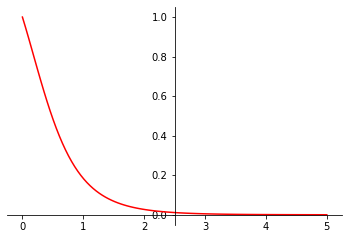

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,5,100)

# the function, which is y = x^2 here
y = np.exp(-x)/(x**2+1)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [ ]:
import numpy as np
n=1000000
a=0
b=10**3
h=(b-a)/n
x=a
s=0
for k in range(n):
  y1=np.exp(-x)/(x**2+1)
  x=x+h
  y2=np.exp(-x)/(x**2+1)
  s=s+(y1+y2)*h/2
  k=k+1
print(s)

0.6214497075691311


In [ ]:
import numpy as np
n=1000000
a=0
b=10**3
h=(b-a)/n
x=a
s=0
for k in range(n):
  y1=x**3/(np.exp(-x)-1)
  x=x+h
  y2=x**3/(np.exp(-x)-1)
  s=s+(y1+y2)*h/2
  k=k+1
print(s)

nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


# Using integrals to estimate values of irrational numbers

## Problem: find an estimate of the Euler number

One of the definition of the Euler number is the solution of the equation:
$$
\ln(e) = 1
$$
In other words, the Euler number $e$ is the number so that the integral of the reciprocal function between $1$ and $e$ equals 1:
$$
\int_{1}^e \frac{1}{x}dx = 1
$$
Hence, another way of 

In [ ]:
import random as rand

h=0.000001
x=1
s=0
n=0
while s < 1:
  x = x + h
  s = s + h*(1/x)
  n=n+1
print('Le nombre e est encadré par', x-2*h,'<e<',x+2*h)

Le nombre e est encadré par 2.7182810000181337 <e< 2.7182850000181333


## Problem: find an estimate of $\sqrt{2}$

Similarly to the previous problem, we can consider that $\sqrt{2}$ is the solution of the equation:
$$
x^2 = 2\ ,
$$
which basically means that the integral of $2x$ between $x=0$ and $x=\sqrt{2}$ equals $2$:
$$
\int_{0}^{\sqrt{2}}2x\ dx = 2
$$

In [ ]:
import random as rand

h=0.000001
x=1
s=0
n=0
while s < 1:
  x = x + h
  s = s + h*(2*x)
  n=n+1
print('Le nombre e est encadré par', x-2*h,'<$\sqrt{2}$<',x+2*h)


Le nombre e est encadré par 1.414211999965924 <$\sqrt{2}$< 1.414215999965924


# Ordinary differential equations (ODEs)

## First order ODEs

A first order differential equation has the general form:
$$
F(y,y',x) = 0\ ,
$$
where $y$ is function of $x$ and $y'=\frac{dy}{dx}$ is the first order derivative of $y$, and where $F$ is a functional (function of function). 

In this activity, we will focus only on the first order ODEs of this form:
$$
y' = F(y,x)\ . 
$$
Before we learn how to solve the general case, let's look at a simple example:
$$
y' = ay+b\ ,
$$
where $a,b$ are two real numbers. We call this equation a first order linear inhomogeneous ODE with constant coefficient. *Inhomogeneous* means that the term $b$ is non-zero, *constant coefficients* means that the coefficients that multiplied $y'$ and $y$ are both constant. 

In order to solve numerically this equation using the Euler algorithm, one has to remember what is the definition of $y'$:
$$
y' = \frac{dy}{dx} = \lim_{h\rightarrow 0}\frac{y(x+h)-y(x)}{h}\ .
$$
Basically this means that the first order derivative is the limit when $h\rightarrow 0$ of the rate of change of the function between two points $x$ and $x+h$. Numerically, obvioulsy we cannot take this limit , and hence, we have to keep the value of $h$ fixed, but small enough so that the solution is a good approximation of the solution we would find in the limit $h\rightarrow 0$. 

If one keeps $h$ fixed and non-zero, we can rewrite the equationa as:
$$
\frac{y(x+h)-y(x)}{h}=ay(x)+b\ ,
$$
which can be rewritten as:
$$
y(x+h) = y(x) + h\cdot (ay(x)+b)
$$

Say, we want to find the solution of the equation in the interval $I=[x_0,x_f]$. The strategy consists of dividing the interval into $n$ small intervals of length 
$$
h = \frac{|x_f-x_0|}{n}\ ,
$$
where $n$ is large enough so that $h\ll |x_f-x_0|$.  

For finite value of $h$, the ODE is nothing but a recursive relation for a sequence $y_{k}=y(x_k)$, where $x_{k} = x_0 + k\cdot h = x_0 + k\cdot (\frac{x_f-x_0}{n})$. The equation above now reads:
$$
y_{k+1}= y_{k} + h\cdot (ay_k+b)  
$$
We consider the initial condition to be
$$
y(x_0) = y_0\ .
$$
Then, we can calculate $y_1$ as
$$
y_1 = y_0 + h(ay_0+b)\ ,
$$
and $y_2$ as:
$$
y_2 = y_1 + h (ay_1+b)\ ,
$$
and so on. 

The strategy is now clear, we have to create a sequence and iterate the calculation of the subsequent terms using a loop. 



**Example** 

We consider the following ODE:
$$
y'=-y+2,\ y(0)=0\ , x\in[0,5]\ .
$$

First, let's write a code to print the list of 10 terms of the sequence using a *for loop*: 


In [ ]:
a=-1
b=2
u=0
xo=0
xf=5
n=10
h=(xf-xo)/n

for k in range(n):
  print(u)
  u=u+h*(a*u+b)
  k=k+1



0
1.0
1.5
1.75
1.875
1.9375
1.96875
1.984375
1.9921875
1.99609375


We could also create a list and round up to 3 digits:

In [ ]:
a=-1
b=2
u=0
xo=0
xf=5
n=10
h=(xf-xo)/n
L=[]
for k in range(n):
  L.append(round(u,3))
  u=u+h*(a*u+b)
  k=k+1
print(L)


[0, 1.0, 1.5, 1.75, 1.875, 1.938, 1.969, 1.984, 1.992, 1.996]


Now, we can plot the graph representing the list as a function of the step. We also want to subdivide the interval into 100 steps in order to be more precise.

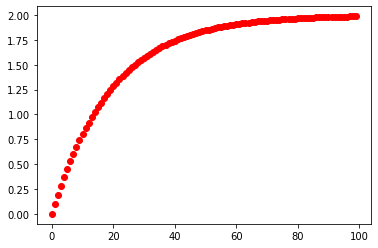

In [ ]:
from matplotlib import pyplot as plt
a=-1
b=2
u=0
xo=0
xf=5
n=100
h=(xf-xo)/n
L=[]
for k in range(n):
  L.append(round(u,3))
  u=u+h*(a*u+b)
  k=k+1
plt.plot(L,'ro')

The x-axis represents the number of steps. We could create a list $L_x$ with the values of x in the set $\{x_0,x_1,x_2,\cdots,x_{n-1},x_f\}$ and graph the list $L_y$ with the number of the sequence $(y_k)_k$ versus $L_x$: 

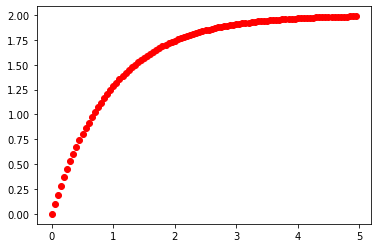

In [ ]:
from matplotlib import pyplot as plt
a=-1
b=2
u=0
xo=0
xf=5
x=xo
n=100
h=(xf-xo)/n
Ly=[]
Lx=[]
for k in range(n):
  Ly.append(round(u,3))
  Lx.append(x)
  u=u+h*(a*u+b)
  x=x+h
  k=k+1
plt.plot(Lx,Ly,'ro')

We can easily generalize to any equation of the form:
$$
y' = F(y,x), y(0)=y_0,\ x\in[x_0,x_f]\ .
$$
It suffices to discretize the interval $[x_0,x_f]$ intro $n$ ssmall intervals of length $h=\frac{x_f-x_0}{n}$ as we did before and obtain the recursive relation:
$$
y_{k+1} = y_k + h\cdot F(y_k,x_k)\ .
$$

**Example1:** Consider the so-called logistic equation:
$$
y' = r\ y\ (1-\frac{y}{L}),\ y(0)=y_0,\ x\in[x_0,x_f]\ ,
$$
where $r$ and $L$ are two non-zero real numbers. For this example, we take $r=1.2,\ L=1000,\ x_0=0,\ x_f=20,\ y_0=10$.

The discretized equation reads:
$$
y_{k+1} = y_k + h\cdot r\ y_{k} (1-\frac{y_k}{L})\ .
$$

**Example2:**
Consider this equation (first order linear inhomogeneous ODE with non-constant coefficient):
$$
y' = x^2 y + e^{-x},\ y(0)=0,\ x\in[0,2]\ .
$$
The discretized equation reads:
$$
y_{k+1} = y_k + h\cdot (x_k^2 y_k + e^{-x_k})\ .
$$

**Example3:**
Now, consider this non-linear equation:
$$
y' = -\frac{1}{x^4+1}y^2 +\frac{1}{y^4} + e^{-y},\ y(0)=1,\ x\in[0,0.7]\ .
$$
The discretized equation reads:
$$
y_{k+1} = y_k + h\cdot (-\frac{1}{x_k^4+1} y_k^2 + \frac{1}{y_k^4} + e^{-y_k})\ .
$$



Let's write the code for example 1:

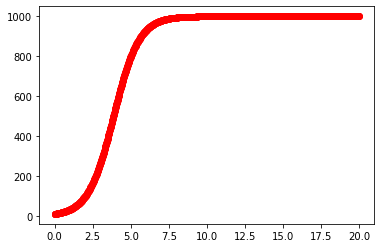

In [ ]:
from matplotlib import pyplot as plt
r=1.2
L=1000
u=10
xo=0
xf=20
x=xo
n=1000
h=(xf-xo)/n
Ly=[]
Lx=[]
for k in range(n):
  Ly.append(round(u,3))
  Lx.append(x)
  u=u+h*r*u*(1-(u/L))
  x=x+h
  k=k+1
plt.plot(Lx,Ly,'ro')

The second example:

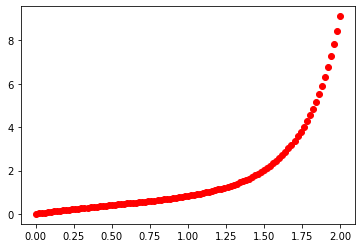

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

u=0
xo=0
xf=2
x=xo
n=100
h=(xf-xo)/n
Ly=[]
Lx=[]
for k in range(n+1):
  Ly.append(round(u,3))
  Lx.append(x)
  u=u+h*((x**2)*u + np.exp(-x))
  x=x+h
  k=k+1
plt.plot(Lx,Ly,'ro')

Problem 3:

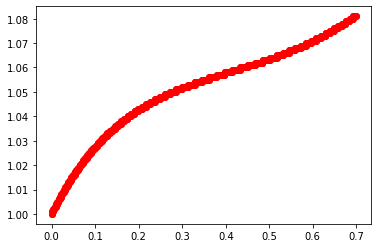

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

u=1
x=0
xf=0.7
x=xo
n=1000
h=(xf-xo)/n
Ly=[]
Lx=[]
for k in range(n):
  Ly.append(round(u,3))
  Lx.append(x)
  u=u+h*(-(1/(1+x**4))*u**2 + (1/u**4) + np.exp(-u))
  x=x+h
  k=k+1
plt.plot(Lx,Ly,'ro')

## Problems

**Problem 1:** Solve the following ODEs using the Euler algorithm: 
$$
y' = -0.2y-0.01y^2-10,\ y(0)=0,\ x\in[0,5]\ .
$$

$$
y' = -0.2x y-0.01y^2/x-10,\ y(1)=2,\ x\in[1,10]\ .
$$



## Second order ODEs

# Application to physics

## Fall of an object in a viscous fluid

The equation of motion of an object falling in a viscous fluid with laminar flow is:
$$
\frac{dv}{dt} = -\beta v +g,\ v(0)=v_0
$$
where $g$ is the acceleration of gravity,$\beta=\alpha/m$ where $\alpha$ is the drag and $m$ is the mass of the object, and where $v_0$ is the initial velocity of the object.  For a spherical object, 
$$
\beta = \frac{6\pi \eta r}{m}\ ,   
$$
where $\eta$ is the dynamical viscosity of the fluid and $r$ is the radius of the object. 
Following the method above, it is easy to solve numerically such an equation. We will take the parameters: $v_0=0 \text{m/s},\ r = 0.005 \text{m},\ m=0.001\text{kg},\ g=9.81 \text{ms}^{-1},\ \eta = 8.90 \times 10^4 \text{Pa·s}$ (small metalic object falling in water). We look at the evolution of the velocity in the time interval $t\in[0,50]$, where $t$ is measured in second.  

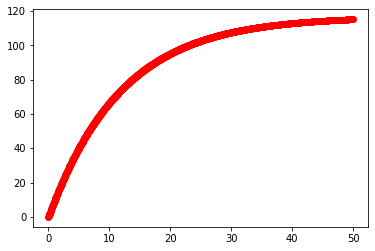

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

v0=0
r=0.005
m=0.001
g=9.81
eta=8.9*10**(-4)

beta=6*np.pi*eta*r/m

v=v0
t=0
tf=50
n=1000
h=(tf)/n
Lv=[]
Lt=[]
for k in range(n):
  Lv.append(v)
  Lt.append(t)
  v=v+h*(-beta*v+g)
  t=t+h
  k=k+1
plt.plot(Lt,Lv,'ro')

To find the position as a function of time, one should remember that the velocity is the first order derivative of the position. Therfore, it suffices to solve the ODE:
$$
\frac{dz}{dt} = v\ ,
$$
which means that the displacement is the integral of the velocity:
$$
z(t) - z(0) = \int_{0}^{t}v(\tau)d\tau
$$

To solve numerically this integral for $t=n\delta t = t_n,\ n=0,1,2,\cdots, N$, we should simply sum over the values of the velocity $v(t_k)\delta t,\ k=0,1,2,\cdots, n$, where $t_k = k\delta t$ and $
\delta t=\frac{t_f}{N}$ is the duration of the small steps between $t=0$ and $t=t_f$:
$$
z(t_n) = \sum_{k=0}^{n} v(t_k)\delta t\ .
$$

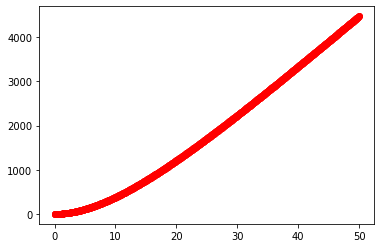

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

v0=0
r=0.005
m=0.001
g=9.81
eta=8.9*10**(-4)

beta=6*np.pi*eta*r/m

v=v0
z=0 # initial condition for z
t=0
tf=50
n=1000
h=(tf)/n
Lv=[]
Lz=[] # we create a new list to collect the values of z
Lt=[]
for k in range(n):
  Lv.append(v)
  Lz.append(z) # we add z to the list Lz
  Lt.append(t)
  v=v+h*(-beta*v+g)
  z=z+h*v # we increment z
  t=t+h
  k=k+1
plt.plot(Lt,Lz,'ro')

## Problem

**Problem 1:** From the graph v vs. t, it is clear that the object reaches a terminal velocity. After reading the value of the terminal velocity (using the graph), write a code to find the time at which the velocity of the ball is greater than $95\%$ of the terminal velocity.

**Problem2:** If the object experiences drag force in a fluid with turbulent flow, the equation of motion is:
$$
\frac{dv}{dt} = -\gamma |v|v +g\ ,
$$
where $g$ is the acceleration of gravity, where the drag is $\gamma = \frac{C_d \pi \rho r^2}{2m}$, the density of the fluid is $\rho$, the drag coefficient is $C_d =0.5$ (spherical object), and where $r$ is the radius of the object and $m$ its mass. 


1.   Write a code to graph the velocity and the position as a function of time for $\rho = 1.225 \text{kg/m}^3$ (air density), $m=0.45\text{kg}$ and $r=0.23\text{m}$ (soccer ball). 
2.   Write a code to find the terminal velocity of the ball rounded at three digits (tip: *while loop*).   

